In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.facecolor'] = 'w'

In [2]:
def process(sideband, symbols):
    fs = 2.9296875e6/35
    x = np.fromfile(sideband, dtype='float32')
    NFFT = 2**16
    f = np.average(np.abs(np.fft.rfft(
            x[:x.size//NFFT*NFFT].reshape((-1, NFFT))))**2,
            axis=0)*10**(-4.6)
    subcarrier = 22.5e3
    a = int(np.round(subcarrier/fs*NFFT))
    span = 1550
    width = int(np.round(span/fs*NFFT))
    signal = f[a-width:a+width+1]
    noise = np.concatenate((f[a-4*width:a-width], f[a+width+1:a+4*width+1]))
    freqs = np.fft.rfftfreq(NFFT, 1/fs)
    plt.figure()
    plt.plot(freqs[a-width:a+width+1], 10*np.log10(signal))
    plt.plot(freqs[a-4*width:a-width], 10*np.log10(noise[:3*width]), color='C0', alpha=0.5)
    plt.plot(freqs[a+width+1:a+4*width+1], 10*np.log10(noise[3*width:]), color='C0', alpha=0.5)
    plt.title('Voyager 1 demodulated data sideband spectrum')
    plt.ylabel('PSD (dB)')
    plt.xlabel('Frequency (Hz)')
    plt.legend(['Signal', 'Noise'])
    noise_pwr = np.average(noise)
    signal_pwr = np.sum(signal) - noise_pwr * signal.size
    signal_cn0 = signal_pwr / noise_pwr * fs / NFFT
    bitrate = 160
    ebn0 = signal_cn0 / bitrate
    print('Sideband:')
    print(f'Data sideband CN0 {10*np.log10(signal_cn0):.2f} dB')
    print(f'EbN0 {10*np.log10(ebn0):.2f} dB')
    cfreq = np.average(freqs[10*np.log10(f) >= 12])
    print(f'Subcarrier frequency {cfreq:.3f} Hz')
    print(f'Subcarrier frequency error {(cfreq/22.5e3-1)*1e6:.1f} ppm')
    symbols = np.fromfile(symbols, dtype='complex64')[5000:]
    M2 = np.average(np.abs(symbols)**2)
    M4 = np.average(np.abs(symbols)**4)
    snr = np.sqrt(2*M2**2 - M4)/(M2 - np.sqrt(2*M2**2 - M4))
    ebn0 = 2*snr
    print('Symbols fourth-order moment SNR estimate:')
    print(f'SNR {10*np.log10(snr):.2f} dB')
    print(f'EbN0 {10*np.log10(ebn0):.2f} dB')
    plt.figure()
    plt.plot(symbols.real, '.', alpha=0.01)
    plt.plot(symbols.imag, '.', alpha=0.01)
    plt.title('Voyager 1 symbols')
    leg = plt.legend(['I', 'Q'])
    for lh in leg.legendHandles: 
        lh._legmarker.set_alpha(1)
    plt.xlabel('Symbol number')
    plt.ylabel('Amplitude')

Sideband:
Data sideband CN0 28.02 dB
EbN0 5.97 dB
Subcarrier frequency 22497.347 Hz
Subcarrier frequency error -117.9 ppm
Symbols fourth-order moment SNR estimate:
SNR 2.39 dB
EbN0 5.40 dB


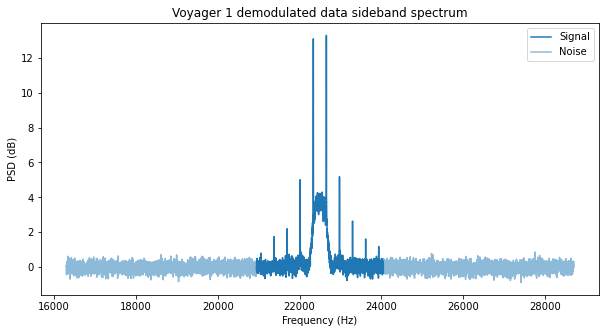

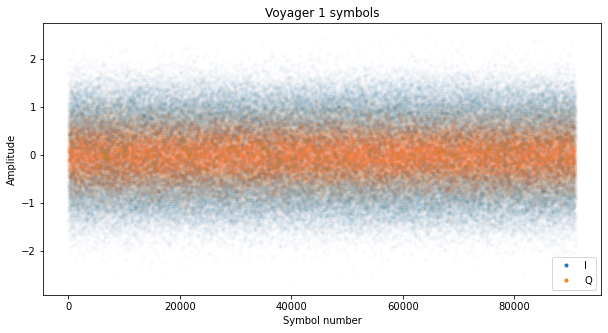

In [3]:
process('2020/sideband_0011.f32', '2020/symbols_0011.c64')

Sideband:
Data sideband CN0 27.36 dB
EbN0 5.32 dB
Subcarrier frequency 22497.347 Hz
Subcarrier frequency error -117.9 ppm
Symbols fourth-order moment SNR estimate:
SNR 1.76 dB
EbN0 4.77 dB


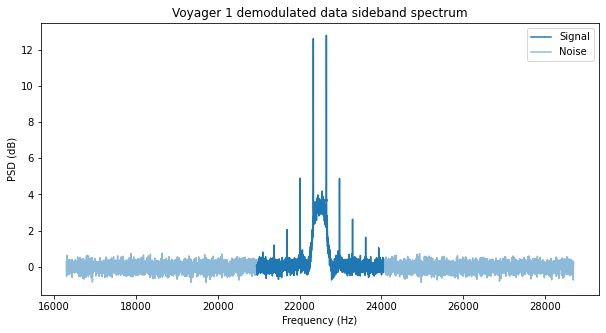

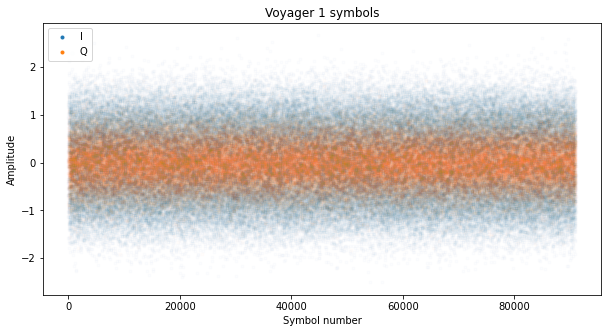

In [4]:
process('2020/sideband_0015.f32', '2020/symbols_0015.c64')